# Z-test for a population mean  (variance known)

## Object

To investigate the significance of the difference between an assumed population mean
$\mu_{0}$ and a sample mean $\bar{x}$.


## Limitations
1. It is necessary that the population variance $\sigma ^ 2$ is known.  

2. The test is accurate if the population is normally distributed. If the population is not normal, the test will still give an approximate guide.

## Method

From a population with assumed mean $\mu_{0}$ and known variance $\sigma ^ 2$, a random sample of size n is taken and the sample mean $\bar{x}$ calculated. The test statistic may be compared with the standard normal distribution using either a one- or two-tailed
test, with critical region of size $\alpha$.

$$ 
   Z=\frac{\bar{x}-\mu_{0}}{\sigma / \sqrt{n}}
$$



## Example 1

For a particular range of cosmetics a filling process is set to fill tubs of face powder with 4 gm on average and standard deviation 1gm. A quality inspector takes a random sample of nine tubs and weighs the powder in each. The average weight of powder is 4.6 gm. What can be said about the filling process?

In [13]:
import scipy

mu_0 = 4.0
sample_size = 9
sample_mean = 4.6
sigma = 1.0


def Z_test(mu_0, sigma, sample_size, sample_mean, alternative = "two_side"):
    
    Z = (sample_mean - mu_0) / (sigma / sample_size**0.5)
    
    if alternative == "two_side":    
        p_value = scipy.stats.norm.sf(abs(Z))*2 #one-sided
    elif alternative == "two_side":
        p_value = scipy.stats.norm.sf(abs(Z)) #twosided
    else:
        assert f"Unknown alternative {alternative}"
    
    return Z, p_value
    
    
Z, p_value = Z_test(mu_0, sigma, sample_size, sample_mean)

print(f"Z Score is {Z:.4f}  p_value(two side): {p_value:.4f} \n")

Z Score is 1.8000  p_value(two side): 0.0719 



## Example 2 Calcualte Z-test with statsmodels

In [29]:
import numpy as np
from statsmodels.stats.weightstats import ztest as ztest

#enter IQ levels for 20 patients
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99,
        105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

# Use statsmodels
Z_score, p_value = ztest(data, value=100)
print(f"statsmodels : Z Score is {Z_score:.4f} p_value: {p_value:.4f}\n")  # default is tow side 

mu_0 = 100
sample_size = len(data)
sample_mean = np.mean(data)
sigma = np.std(data, ddof=1) # Numpy default degree of freedom is 0, normally sample std is used N-1 rather than N 

Z_score, p_value = Z_test(mu_0, sigma, sample_size, sample_mean)

print(f"Manual : Z Score is {Z_score:.4f} p_value: {p_value:.4f}\n")  # default is tow side 

statsmodels : Z Score is 1.5976 p_value: 0.1101

Manual : Z Score is 1.5976 p_value: 0.1101



## Example 3 Monte Carlo Z-test

#### Senario1 Generate point under normal distribution (10, 2)

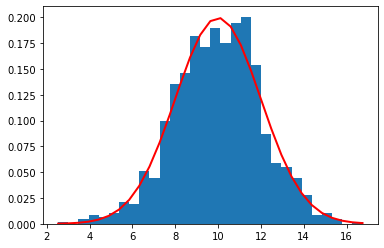

In [73]:
import matplotlib.pyplot as plt

mu, sigma = 10, 2 # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(data, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

The data is genrated from $N(10, 2)$

In [43]:
Z_score, p_value = ztest(data, value=10)
print(f"statsmodels : Z Score is {Z_score:.4f} p_value: {p_value:.4f}\n")  # default is tow side 

statsmodels : Z Score is -0.4930 p_value: 0.6220



The p-value is 0.622 which means we can't refuse the suggestion that the population's mean is 10

#####  Test whether the population's mean is 11

In [46]:
Z_score, p_value = ztest(data, value=11)
print(f"statsmodels : Z Score is {Z_score:.4f} p_value: {p_value:.4f}\n")  # default is tow side 

statsmodels : Z Score is -16.6625 p_value: 0.0000



The p-value is 0.000 which suggest that the population's mean is not 11. 

#### Quest:  Relationship between P-value vs Test Mean  

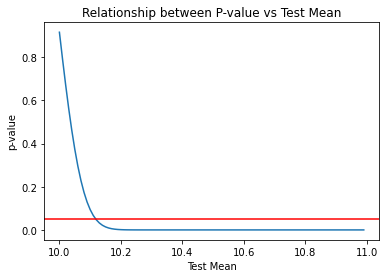

In [74]:
p_value_list = []
x = []

for v in range(100):
    x.append(10 + v/100)
    Z_score, p_value = ztest(data, value=10 + v/100)
    p_value_list.append(p_value)

plt.plot(x, p_value_list)
plt.axhline(y=0.05, color='r', linestyle='-')


plt.title("Relationship between P-value vs Test Mean")
plt.xlabel("Test Mean")
plt.ylabel("p-value")

plt.show()

####  Change original normal distribution to  $\mathcal{N}(10, 4)$ 

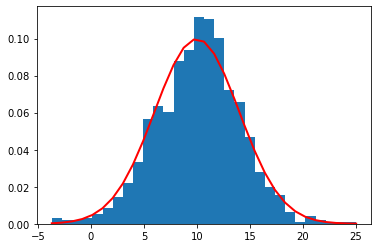

In [76]:
mu, sigma = 10, 4 # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(data, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

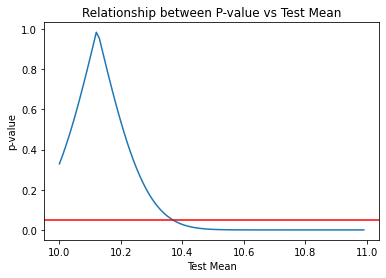

In [77]:
p_value_list = []
x = []

for v in range(100):
    x.append(10 + v/100)
    Z_score, p_value = ztest(data, value=10 + v/100)
    p_value_list.append(p_value)

plt.plot(x, p_value_list)
plt.axhline(y=0.05, color='r', linestyle='-')


plt.title("Relationship between P-value vs Test Mean")
plt.xlabel("Test Mean")
plt.ylabel("p-value")

plt.show()

####  Change original normal distribution to  $\mathcal{N}(10, 10)$ 

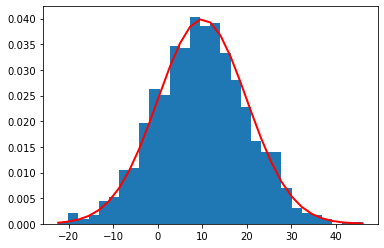

In [78]:
mu, sigma = 10, 10 # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(data, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

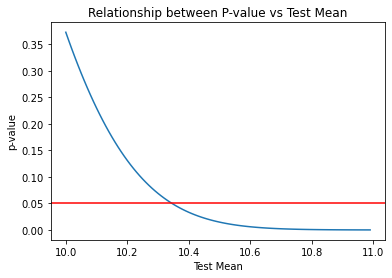

In [79]:
p_value_list = []
x = []

for v in range(100):
    x.append(10 + v/100)
    Z_score, p_value = ztest(data, value=10 + v/100)
    p_value_list.append(p_value)

plt.plot(x, p_value_list)
plt.axhline(y=0.05, color='r', linestyle='-')


plt.title("Relationship between P-value vs Test Mean")
plt.xlabel("Test Mean")
plt.ylabel("p-value")

plt.show()